# Gentle Introduction
Every year people demand more from nature than it can regenerate. Individuals, communities and government leaders use ecological footprint data to better manage limited resources, reduce economic risk, and improve well-being. The Dataset provides Ecological Footprint per capita data for years 1961-2016 in global hectares (gha). Ecological Footprint is a measure of how much area of biologically productive land and water an individual, population, or activity requires to produce all the resources it consumes and to absorb the waste it generates, using prevailing technology and resource management practices. The Ecological Footprint is measured in global hectares. Since trade is global, an individual or country's Footprint tracks area from all over the world.

Apart from predicting numeric values, another important supervised machine learning method is classification and it involves predicting classes (either binary or multinomial classes). In this section, we will cover how to measure performances of class prediction, linear classification methods and non-linear/tree-based methods. We’ll also focus on strategies for applying a successful classification model like interpretability-accuracy trade-off, class and imbalance.

The National Footprint and Biocapacity Accounts (NFAs) measure the ecological resource use and resource capacity of nations from 1961 to 2016. The calculations in the National Footprint and Biocapacity Accounts are primarily based on United Nations data sets, including those published by the Food and Agriculture Organization, United Nations Commodity Trade Statistics Database, and the UN Statistics Division, as well as the International Energy Agency. In this project, we will use this data to classify and predict the quality metrics (qascore) of the ecological footprint data for the different countries. This data includes total and per capita national biocapacity, the ecological footprint of consumption, the ecological footprint of production and total area in hectares.

# Linear Classification & Logistic Regression

Linear classifiers and the importance of class probabilities

For simplicity, we define a linear classifier as a binary classifier that separates two classes (positive and negative class) using a linear separator by computing a linear combination of the features and comparing against a set threshold.

# Logistic Regression: Sigmoid, logit and the log-likelihood

Logistic regression is a linear algorithm that can be used for binary or multiclass classification. It is a discriminative classifier that estimates the probability that an instance belongs to a class using an s-shape function curve called the sigmoid function. The predicted values obtained after using a linear equation on the predictors by applying logistic regression can fall in the range of negative infinity to positive infinity. The sigmoid maps these results by shrinking the value to fall between 0 and 1.  We can say that we use the sigmoid function to transform linear regression into logistic regression.

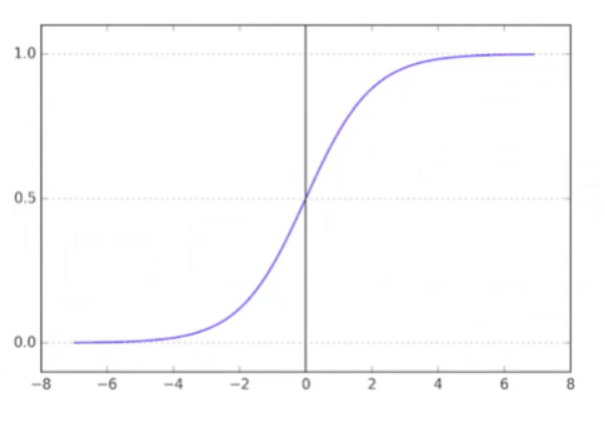
The sigmoid function can be applied to a linear equation

z =~ \beta_0~+~\beta_1  
xz=β0+β1x
to obtain values h between 0 and 1 such that:

h~=~\sigma(z)~=~{1\over 1+e^{-z}}~= ~ {1\over 1+e^{-(\beta_0+\beta_1x)}}  
h = σ(z) =  1/1+e−z =  1/1+e−(β0+β1x)


# Measuring Classification Performance
Cross-validation and accuracy

From the previous module, we now understand why data scientists and machine learning engineers avoid having models that overfit or underfit. Cross Validation (CV) is a well known and trusted method applied to avoid overfitting and enable generalization. Although there are different techniques used in performing cross validation, the fundamental concept involves partitioning the dataset into a number of subsets, holding out a set for evaluation then training the model on the other sets. This gives a more reliable estimate of how the model performs across different training sets because it provides an average score across different training samples used. The only drawback with cross validation is that it takes more time and computational resources however, the gain obtained in having a better model is very well worth this cost. K-Fold cross validation, Stratified K-Fold cross validation and Leave One Out Cross Validation (LOOCV) are some cross validation techniques.

In [1]:
# Linear Classification and Logistic Regression
import pandas as pd
df = pd.read_csv( 'NFA2019public_data', low_memory=False )
#check distribution of target variable
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495416,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495416,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [2]:
df['QScore']

0        3A
1        3A
2        3A
3        3A
4        3A
         ..
72181    3A
72182    3A
72183    3A
72184    3A
72185    3A
Name: QScore, Length: 72186, dtype: object

In [3]:
df[ 'QScore' ].value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

In [4]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [5]:
#for simplicity, we will drop the rows with missing values.
df = df.dropna()

In [6]:
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

1. An obvious change in our target variable after removing the missing values is that there
are only three classes left 
2. and from the distribution of the 3 classes, we can see that
there is an obvious imbalance between the classes. 
3. There are methods that can be applied to
handle this imbalance such as oversampling and undersampling.
4. Oversampling involves increasing the number of instances in the class with fewer instances
while undersampling 
5. involves reducing the data points in the class with more instances.
6. For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.

In [7]:
df[ 'QScore' ] = df[ 'QScore' ].replace([ '1A' ], '2A' )
df.QScore.value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_14848\2823094523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ 'QScore' ] = df[ 'QScore' ].replace([ '1A' ], '2A' )


3A    51473
2A      240
Name: QScore, dtype: int64

In [8]:
df_2A = df[df.QScore== '2A' ]
df_3A = df[df.QScore== '3A' ].sample( 350 )
data_df = df_2A.append(df_3A)

C:\Users\USER\AppData\Local\Temp\ipykernel_14848\1041119248.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = df_2A.append(df_3A)


In [9]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop= True )
data_df.shape
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [10]:
#more preprocessing
data_df = data_df.drop(columns=[ 'country_code', 'country' , 'year' ])

In [11]:
X = data_df.drop(columns= 'QScore' )
y = data_df[ 'QScore' ]

In [12]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state= 0 )
y_train.value_counts()

3A    245
2A    168
Name: QScore, dtype: int64

In [13]:
y_test.shape

(177,)

In [14]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on thetraining data to handle this.
#encode categorical variable



In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.record = encoder.fit_transform(x_train.record)
x_test.record = encoder.transform(x_test.record)

In [16]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 1 )
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=[ 'record' ]))
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=x_train_balanced.drop(columns=[ 'record' ]).columns)
normalised_train_df[ 'record' ] = x_train_balanced[ 'record' ]
x_test = x_test.reset_index(drop= True )
normalised_test_df = scaler.transform(x_test.drop(columns=[ 'record' ]))
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=x_test.drop(columns=[ 'record' ]).columns) 
normalised_test_df[ 'record' ] = x_test[ 'record' ]

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)

LogisticRegression()

In [19]:
#returns
LogisticRegression(C= 1.0 , class_weight= None , dual= False , fit_intercept= True ,
 intercept_scaling= 1 , l1_ratio= None , max_iter= 100 ,
 multi_class= 'auto' , n_jobs= None , penalty= 'l2' ,
 random_state= None , solver= 'lbfgs' , tol= 0.0001 , verbose= 0 ,
 warm_start= False )

LogisticRegression()

# Confusion Matrix, Precision-Recall, ROC curve and the F1-score

Accuracy, precision, recall, F1-score and many others are evaluation metrics used in measuring the performance of classification models. In this section, we discuss these metrics. 

# Confusion Matrix

It is an N x N matrix that gives a summary of the correct and incorrect predicted classification results for the Ntarget classes. The values in the diagonal of the matrix represent the number of correctly predicted classes while every other cell in the matrix indicates the misclassified classes. This means that the more predicted values that fall in the diagonal, the better the model. True positive, false positive, true negative and false negative are terms used when interpreting a confusion matrix.

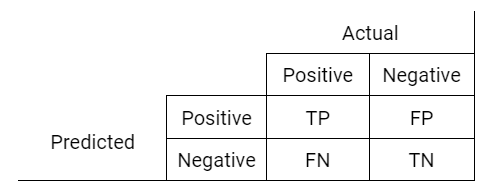

1. True Positive (TP): This is a correct classification where the predicted value is the same as the actual value. Using the table above, this means that actual value was positive and the predicted value was also positive.

2. True Negative (TN): The predicted value also matches the actual value. In this case, it is for the negative class. The actual value is negative and the predicted value is negative.

3. False Positive (FP): Also called a Type I error, this is a misclassification such that the model predicted a positive class while the actual class is negative. Telling a man that he is pregnant is definitely a false positive.
4. False Negative (FN): Also another misclassification where the predicted value is negative and the actual value is positive. Another example will be telling a pregnant woman that she is not pregnant. FN is known as a Type II error.


In [20]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=['2A', '3A'])
cnf_mat

array([[28, 44],
       [53, 52]], dtype=int64)

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,
                        normalised_train_df, y_balanced, cv=5,
                        scoring='f1_macro')
scores

array([0.53961791, 0.60199938, 0.57125   , 0.55102041, 0.5083612 ])

# Accuracy

This is the ratio of the number of correctly predicted instances to the total number of instances. It is a commonly used metric suitable when the target classes are not imbalanced. A high accuracy does not necessarily mean that the model has high predicting power. Hence, depending on the task, it is important to not use only the accuracy metric because it does not provide enough information about the model.

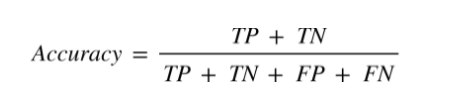



In [22]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 45


# Precision

The ratio of correctly predicted instances of a class to the total number of items predicted by the model to be in that class is referred to as precision (known as Positive Predicted Value - PPV). This translates to the total percentage of the results obtained that are relevant. For the positive class, it is the ratio of true positives to the sum of true positives and false positives

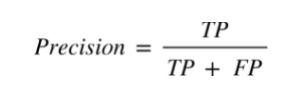


In [23]:
precision= precision_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 35


Recall

Known as the sensitivity of the model, recall gives a percentage of total relevant results correctly predicted by the model. It is the ratio of the true positives to the actual number of positives (true positives and false negatives).

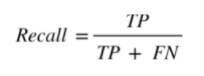


Like in the previous module where we discussed the bias-variance trade-off, there is also a trade-off between precision and recall. It is impossible to maximise both metrics simultaneously because an increase in recall decreases precision. Identify which metric is important based on your task and optimise.

In [24]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label='2A')
print('Recall: {}'.format(round(recall*100), 2))

Recall: 39


# F1-Score

This metric is the harmonic mean of precision and recall that aims to have an optimal balance of both. The F1-Score is quite easy to use and can be focused on to maximize as opposed to maximizing precision and recall.

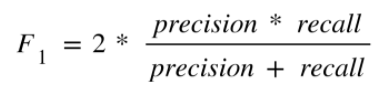

In [25]:
f1 = f1_score(y_true=y_test, y_pred = new_predictions, pos_label='2A')
print('F1: {}'.format(round(f1*100), 2))

F1: 37


# ROC Curve

The Receiver Operating Characteristics (ROC) curve is a probability curve that measures the performance of a classification model at different set thresholds. Recall also known as the True Positive Rate (TPR) is plotted on the y-axis against the False Positive Rate (FPR) on the x-axis.

The code examples above are not the optimal results that can be obtained with the model. Hyperparameter tuning can be performed to improve the model.

https://colab.research.google.com/notebooks/mlcc/logistic_regression.ipynb?hl=en

# K-Fold Cross Validation

This technique is called K-Fold because the data is split into K equal groups.  If k=5,a 5-fold cross validation can be performed such that the data is split into k1, k2, k3, k4 and k5. The model is trained on k2 - k5 and evaluated on k1 then repeated k times until every group is used to train and test the model.

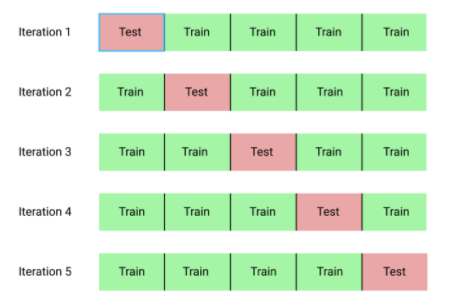

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
kf = KFold(n_splits=5)
kf.split(normalised_train_df)
f1_scores = []


In [27]:
# run to every splits
for train_index, test_index in kf.split(normalised_train_df):
    x_train, x_test = normalised_train_df.iloc[train_index],normalised_train_df.iloc[test_index]
    y_train, y_test, = y_balanced[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
    

In [28]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(98, 8)
(392, 8)
(98,)
(392,)


In [29]:
import numpy as np

In [30]:
# save result to list
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A')*100)

# Stratified K-Fold Cross Validation

Although similar to the technique described above, Stratified K-Fold cross validation ensures that in every fold, there is an equal proportion of each target class to obtain a good representation of the data and avoid imbalance and biased results. For example, if there are two target classes t1 and t2 with equal distribution in the data, it is best to ensure that the folds also have the same distribution.

In [31]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)
f1_scores = []

In [32]:
# run for every splits
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index], np.array(normalised_train_df)[test_index]
    y_train, y_test, = y_balanced[train_index], y_balanced[test_index]
    model = LogisticRegression().fit(x_train, y_train)
    

In [33]:
# save result to list
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label='2A'))

# Leave One Out Cross Validation (LOOCV)

In this method, one instance is left out and used as the test set while the model is trained on N-1data points where N is the number of data points. This means that the number of instances and folds are equal.

In [34]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
score = cross_val_score(LogisticRegression(),
                        normalised_train_df, y_balanced, cv=loo,
                        scoring='f1_macro')
average_score = scores.mean()*100
    

In [35]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(98, 8)
(392, 8)
(98,)
(392,)


# Multiclass Classification

Multilabel and Multiclass classification

Multiclass classification deals with more than two classes where an instance is classified into a single class. For example, given a dataset with a set of features that describe the weather such that the classes are sunny, rainy and windy, a multiclass classification task will only give a single class as the result. In contrast, multilabel classification classifies an instance into a set of target labels. Articles and movies are examples where this can apply. An article can discuss a single topic but can also be about politics, religion, education and many more while movies are commonly tagged to multiple genres such as comedy, adventure, action.

The Sigmoid and the Softmax function

The softmax function is quite similar to the sigmoid explained earlier. It is used for multiclass classification because it can obtain the probabilities for various classes such that the probabilities of each class sum to 1. This means that an increase in the probability of a class causes a decrease in the probability of at least one of the other classes. It can also be referred to as a generalization of logistic regression or the sigmoid function and can be used for multi-class classification while the sigmoid function is used in multi-label classification. The softmax function is popularly used in the output layers of neural networks. Although the sum of the outputs of the softmax must be 1, this is not the same for the sigmoid function.


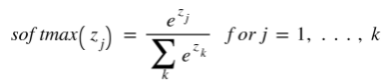

# Tree-Based Methods and The Support Vector Machine

In [36]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df, y_balanced)

DecisionTreeClassifier()

# Tree-Based Methods and The Support Vector Machine

Linear and non-linear Support Vector Machine

Support Vector Machine (SVM)  is a supervised machine learning algorithm that is used to solve both classification and regression tasks. In classification, the algorithm uses a line or hyperplane to separate classes by using data points close to the boundary (support vector)  for each class and a hyperplane that maximizes the distance between the classes. For clarity, a hyperplane is a line that linearly separates data points. Although there can be several hyperplanes between classes, the optimal hyperplane which has the maximum distance or margin between itself and the support vectors is chosen.

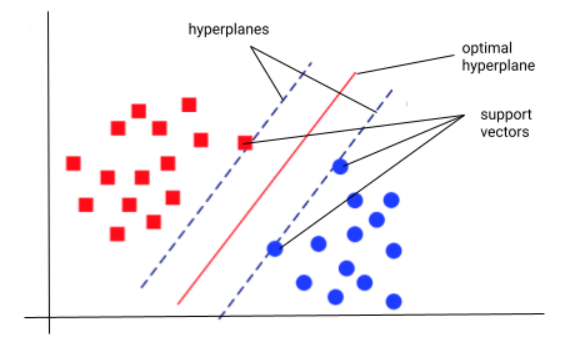

As we know, data is not always linearly separable such that a straight line might not be able to adequately segregate classes. Although SVM is a linear classifier, it can be used to classify a non-linear dataset by transforming the dataset to a higher dimensional feature space where it can be linearly separable. This is done using the kernel trick such that a kernel function is applied on each data point to map to a higher dimensional space. 

# Decision Trees and CART algorithm 

The decision tree is a widely used non-parametric supervised machine learning approach that splits instances in a dataset based on different decision rules inferred from the features in the dataset. It is a tree-based algorithm with nodes that represent a specific attribute or decision rule such that for an instance, a question is asked at a node and possible answers to the question found on both edges. This is a sequential process that involves recursive partitioning of nodes for several features until the leaves for the tree provides the final output or class for that instance. Decision trees can also be used to solve regression problems.

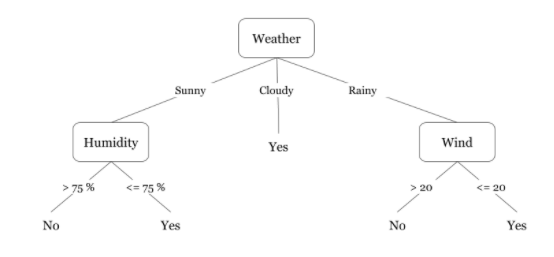

ID3 - Iterative Dichotomiser 3, CART - Classification and Regression Trees and C4.5 are some examples of decision tree algorithms. In this section, we only discuss the CART algorithm. The CART predictive model generates decision rules that have a binary tree representation such that each non-terminal node has two child nodes as opposed to some other tree-based methods that have more child nodes. It supports numerical target variables. At every node, the best split is chosen such that the splitting criterion is maximised. Gini impurity index is used as the splitting criterion in CART.

Gini Impurity: this is a measure of the chance that a randomly selected instance will be wrongly classified when selected. For different classes in a dataset, with p(i) as the probability that the chosen instance belongs to class i, the gini impurity index for all classes G, can be calculated such that:

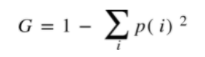

Gini impurity index values range between 0 and 1 such that 0 translates to a pure classification where all instances belong to the same class while 1 means that there is a random distribution of the instances across different classes. To select the best split, the gini gain is calculated by taking a weighted sum of the gini impurity index then subtracting from the original impurity. Higher gini gain leads to better splits simply put, the lower the gini impurity, the better the split.


# Ensemble Methods
Beyond decision trees and ensemble classifiers

Ensembling in machine learning involves the combination of several classifiers to obtain an optimal model with better performance as opposed to just a single classifier. These classifiers can be of different algorithms and hyperparameters. Bagging, boosting, stacking and blending are methods classifiers can be combined.


# Bagging

Bootstrap Aggregation or Bagging is a parallel ensembling technique that randomly bootstraps or samples the dataset with replacement to create subsets from the original. Multiple models are then trained using these subsets and the predicted results from these models aggregated to return final predictions. Bagging results in a final model that has less variance than its base classifiers. 

1. Bagging: Random Forests

When bagging is applied to decision trees, it results in random forests which is a supervised learning algorithm that has a large number of decision trees. For an instance in the dataset, each tree returns a prediction for the class the instance belongs to then, the class with the most votes becomes the final class for that instance. In random forests, it is assumed that a group of uncorrelated trees will do better than an individual tree. While some of the trees might be wrong in their predictions, many others will be correct.

# Boosting: AdaBoost, Gradient Boosting and XGBoost

0. Boosting

Boosting is a sequential process where every phase attempts to correct the errors made by the previous model. The main principle is to fit multiple weak learners which are slightly better than just random guessing. In contrast to bagging, boosting attempts to reduce both variance and bias. AdaBoost, Gradient Boosting and XGBoost are examples of boosting algorithms.

1. AdaBoost

Adaptive Boosting is the first boosting algorithm. It is a very popular method for boosting that can be used on any classifier to present a more accurate model and improve its performance.  It can be described with the following steps: create a subset from the entire dataset, assign equal weights to the data points, create a base model using this subset, predict using this model, calculate errors from the predicted results, assign higher weights to misclassified instances to increase their chances of being selected, create another model that tries to correct these mistakes and make new predictions then repeat until the maximum number of models specified are created. The final model is the weighted average of all the weak learners created. AdaBoost is very sensitive to noisy data and outliers so it is important to remove these when using AdaBoost.

2. Gradient Boosting

This is another boosting algorithm that improves model performance where each model in the ensemble minimizes a loss function using gradient descent. The loss function which is used to obtain an estimate of how the model is performing, a weak learner - a model only slightly better than random guessing typically decision stumps (a decision tree with a single split - one level) and an additive model that combines the weak learners to make the final model are three important components in gradient boosting. 

3. XGBoost

Extreme Gradient Boosting is a supervised learning algorithm that implements gradient boosting by building trees parallely while applying regularization. It is well known for its scalability and fast execution. XGBoost can automatically identify missing values in data and it builds very deep trees before pruning for optimisation.